# INTRODUCTION


In the current digital age, where data is everywhere, it is challenging to channelize and scrape the data and extract meaningful insights as per requirements. Our project is built to meet this challenge, using a standard deep neural network model to raise the precision of relevance predictions for text data. It is now pivotal to make intelligent and accurate prediction using practical application and correction through machine learning models for categorizing texts according to their relavance, which is basis for advance information retrieval and content creation. By using layers of neurons we have intricately designed our neural network model to extract key language patterns from the data.

This neural network converts unprocessed data into meaningful information by identifying the semantic patterns and links. We have implemented strategic methods like the use of embedding layers, hyperparameters, strategic dropout layers to avoid overfitting, achieve a test score of 87.223% using our LSTM model. We have used 3 other models - Standard ML baseline, 3 NN and DNN for testing the data out of which Complex-LSTM gave the highest accuracy.

In [ ]:
import tensorflow as tf

# METHODOLOGY
## DATA EXPLORATION AND PRE-PROCESSING:

The dataset was first loaded from Parquet files in this phase, then it was then transformed to CSV format for easier data processing. Using the pandas data manipulation library in Python requires completing this crucial step. Text preprocessing was done after loading the dataset in order to normalize the 'body' text in preparation for additional analysis. To clean and normalize the text data, this preprocessing involved deleting HTML tags, changing all characters to lowercase, filtering out non-alphabetic letters, tokenization, normalization, and the use of TF-IDF vectorization. To lower noise and boost the performance of the ensuing machine learning models, these steps are crucial. We also using text padding to standardize the input lengths.

##Model Training and Validation Strategy

We split our dataset into training, testing, and validation sets, to maintain consistency   An initial validation accuracy of 95% was obtained by training a baseline Logistic Regression model with text that had been translated to numerical data using TfidfVectorizer. Next, in order to evaluate model performance and avoid overfitting, the data was divided into training and validation sets. Later on, this approach was expanded to include more intricate neural network models, and a crucial performance indicator was validation accuracy. Prior to training the neural networks, the input characteristics were constantly scaled in order to guarantee that the gradient descent optimization process operated effectively.


In [ ]:
import pandas as pd

# Load the train and test datasets
train_df = pd.read_parquet('relevance_train.parquet')
test_df = pd.read_parquet('relevance_test.parquet')

# Convert to CSV for easy access in later steps (if needed)
train_df.to_csv('relevance_train.csv', index=False)
test_df.to_csv('relevance_test.csv', index=False)

# Display the first few rows of the train dataset to understand its structure
train_df.head(), train_df.shape, test_df.shape

ImportError: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.

## STANDARD NEURAL NETWORK:

  The code performs a text classification task by preprocessing the data and then using machine learning to provide predictions. It first loads text data from CSV files and uses function called 'clean_text' to standarize the text for analysis by removing HTML tags, changing all letters to lowercase, and deleting non-alphabetic symbols. Next, it uses a technique called TF-IDF vectorization—which measures the value of terms inside the documents while taking into account their frequency throughout the entire corpus—the cleaned text is converted into a numerical representation. The algorithm then divides the training data into subsets for model training and validation using this numerical representation. Next using a smaller training set, a logistic regression model is built. This model predicts on the validation set after training, and the code computes and outputs the model's accuracy on the validation data—which comes out to be 87.25%.

  





In [ ]:
import re
import pandas as pd

def clean_text(text):
    if text is None:
        text = ''  # Treat None as empty string
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = text.lower()  # Lowercase the text
    text = re.sub(r'[^a-z\s]', '', text)  # Keep only letters and spaces
    return text

# Assuming train_df and test_df are already defined DataFrames
train_df['cleaned_body'] = train_df['body'].apply(clean_text)
test_df['cleaned_body'] = test_df['body'].apply(clean_text)



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train = tfidf_vectorizer.fit_transform(train_df['cleaned_body'])
y_train = train_df['judgement']
X_test = tfidf_vectorizer.transform(test_df['cleaned_body'])


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_split, y_train_split)

# Predict on the validation set
y_val_pred = lr_model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy:.4f}")


Validation Accuracy: 0.8725


### Validation Accuracy: 0.8725

##  THREE- NN MODEL:

The study examines a correlation between validation accuracy and the quantity of neurons present in the hidden levels of a three-layer neural network model. It gathers and trains the models in a loop over a range of hidden layer of neuron counts in 32, 64, 128, 256, and 512 arrangements. The maximum validation accuracy of 0.8808 was obtained by the 32-neuron model, indicating that this dataset's complexity was ideal. A slight decline in performance advances was indicated by maintaining an accuracy of 0.8801 when the number of neurons was increased to 64.With the expansion to 128 neurons produced an accuracy that was marginally lower (0.8783) and when the neurons were increased to 256, the accuracy dropped to 0.8768. The largest model with 512 neurons showed a rise to 0.8808, suggesting that as network complexity rose, overfitting may have occurred. This implies that adding complexity in the neuron network doesn't always translate into better performance. This graph aids in determining the ideal neuron count that strikes a compromise between model complexity and performance on hypothetical data.



Neurons: 32, Best Validation Accuracy: 0.8808
Neurons: 64, Best Validation Accuracy: 0.8801
Neurons: 128, Best Validation Accuracy: 0.8783
Neurons: 256, Best Validation Accuracy: 0.8768
Neurons: 512, Best Validation Accuracy: 0.8808


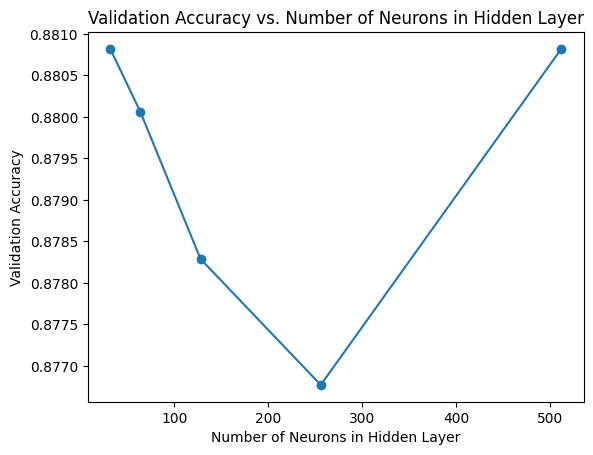

In [ ]:
import tensorflow as tf
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense


# It's good practice to scale the input features when using neural networks
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_split.toarray())  # Convert sparse matrix to dense
X_val_scaled = scaler.transform(X_val.toarray())  # Convert sparse matrix to dense

# Neurons to test in the hidden layer
neurons = [32, 64, 128, 256, 512]
validation_accuracies = []

for n in neurons:
    # Define the model
    model = Sequential([
        Dense(n, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train_scaled, y_train_split, epochs=10, batch_size=256, validation_data=(X_val_scaled, y_val), verbose=0)

    # Store the best validation accuracy
    best_val_acc = max(history.history['val_accuracy'])
    validation_accuracies.append(best_val_acc)
    print(f"Neurons: {n}, Best Validation Accuracy: {best_val_acc:.4f}")

# Plotting the performance
plt.plot(neurons, validation_accuracies, marker='o')
plt.xlabel('Number of Neurons in Hidden Layer')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Number of Neurons in Hidden Layer')
plt.show()


## DNN MODEL :

The code in this deep learning experiment aims to optimize a neural network by adjusting two important aspects of its architecture: the quantity of hidden layers and the activation functions that are employed in those levels. A sequential model architecture is used for the initial section, with one hidden layer added at a time up to five layers later. Because the classification problem is binary in nature, each configuration includes 256 neurons per layer with ReLU activation, and sigmoid neurons are used in the output layer. In other words, adding layers up to a certain point can enhance performance, but beyond that, it might lead to decreasing returns, possibly owing to overfitting or the model becoming too complex. The model reaches peak validation accuracy with a three-layer structure.

The experiment then tests ReLU, tanh, and sigmoid by varying the activation function throughout three layers. In this instance, the sigmoid function performs marginally better than the others, demonstrating the range of effects that distinct activations can have on the model's capacity to generalize from training data to validation data. The comparative performances of these configurations are clearly visualized by the line and bar graphs that are presented; the accuracy of the neural network's classification is significantly influenced by the activation function choice, and the deeper network is not necessarily superior. By using a methodical approach to model tuning, it becomes easier to find a configuration that works for the specifics of the dataset at hand while striking a balance between learning capacity and model complexity.


Layers: 1, Best Validation Accuracy: 0.8798
Layers: 2, Best Validation Accuracy: 0.8836
Layers: 3, Best Validation Accuracy: 0.8836
Layers: 4, Best Validation Accuracy: 0.8808
Layers: 5, Best Validation Accuracy: 0.8816


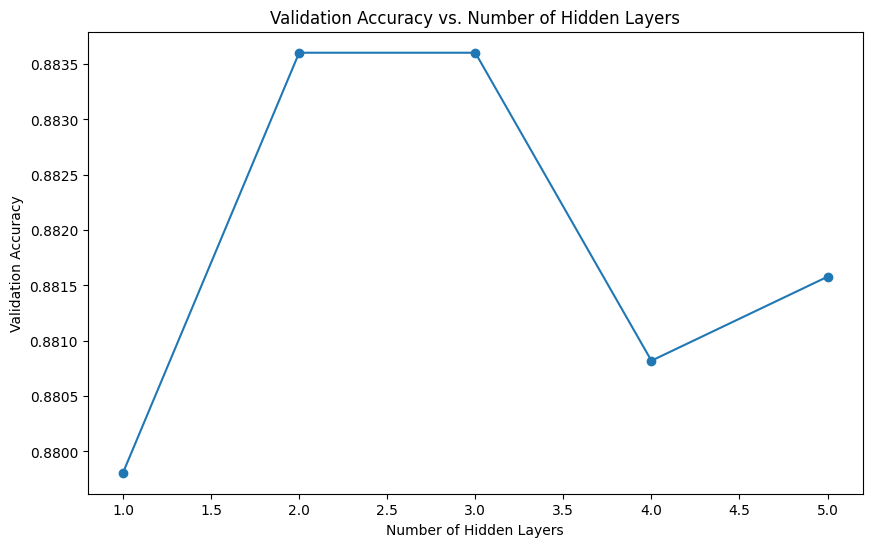

In [ ]:
layer_configs = [1, 2, 3, 4, 5]  # Number of hidden layers to test
layer_validation_accuracies = []

for config in layer_configs:
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    for _ in range(1, config):
        model.add(Dense(256, activation='relu'))  # Adding additional layers based on the config
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train_scaled, y_train_split, epochs=10, batch_size=256, validation_data=(X_val_scaled, y_val), verbose=0)

    best_val_acc = max(history.history['val_accuracy'])
    layer_validation_accuracies.append(best_val_acc)
    print(f"Layers: {config}, Best Validation Accuracy: {best_val_acc:.4f}")

# Plotting the performance for varying layers
plt.figure(figsize=(10, 6))
plt.plot(layer_configs, layer_validation_accuracies, marker='o')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Number of Hidden Layers')
plt.show()


Activation: relu, Best Validation Accuracy: 0.8816
Activation: tanh, Best Validation Accuracy: 0.8750
Activation: sigmoid, Best Validation Accuracy: 0.8823


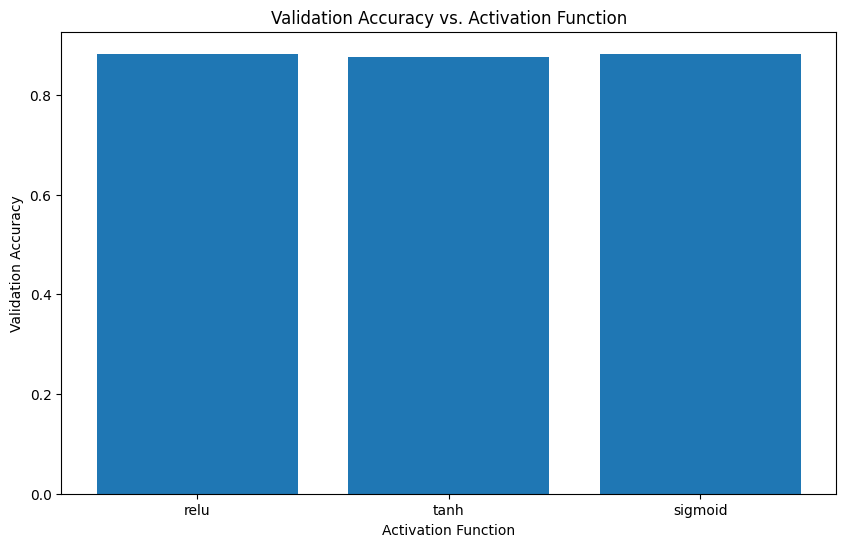

In [ ]:
activation_functions = ['relu', 'tanh', 'sigmoid']
activation_validation_accuracies = []

for activation in activation_functions:
    model = Sequential([
        Dense(256, activation=activation, input_shape=(X_train_scaled.shape[1],)),
        Dense(256, activation=activation),
        Dense(256, activation=activation),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train_scaled, y_train_split, epochs=10, batch_size=256, validation_data=(X_val_scaled, y_val), verbose=0)

    best_val_acc = max(history.history['val_accuracy'])
    activation_validation_accuracies.append(best_val_acc)
    print(f"Activation: {activation}, Best Validation Accuracy: {best_val_acc:.4f}")

# Plotting the performance for varying activation functions
plt.figure(figsize=(10, 6))
plt.bar(activation_functions, activation_validation_accuracies)
plt.xlabel('Activation Function')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Activation Function')
plt.show()


##COMPLEX NN- LSTM :

> Add blockquote



In order to process text data for a binary classification problem, this algorithm builds a more sophisticated neural network with an LSTM (Long Short-Term Memory) design. Tokenizing the preprocessed 'cleaned_body' text column from the training and test datasets is the first step in the process, which turns the text into word sequences represented by numbers. These sequences are padded to the length of the longest sequence in order to provide uniform input sizes for the neural network.

The model is composed of an Embedding layer that converts the integer representations into 32-dimensional vectors. This is followed by a 64-unit LSTM layer that has recurrent dropout and dropout fitted to prevent overfitting. A dense output layer with sigmoid activation that is appropriate for binary classification appears in the end. The model makes use of the binary cross-entropy loss function and the Adam optimizer.

In order to prevent overfitting, training is controlled by an early stopping mechanism that monitors the validation loss and stops training if no improvement is observed after three epochs. The increased batch size is probably intended to control the use of computer resources. The output logs show that the model plateaus at approximately 84.31% with little loss improvement during training, indicating that the model has quickly converged to a solution that might not significantly improve with additional training under the current configuration. The model trains for a maximum of five epochs.



In [ ]:
import pandas as pd
import numpy as np
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils import class_weight
import tensorflow as tf

# Load datasets
train_df = pd.read_csv('relevance_train.csv')
test_df = pd.read_csv('relevance_test.csv')

def clean_text(text):
    if pd.isna(text):
        return ""
    text = str(text)
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Retain alphanumeric and spaces
    text = text.lower()
    return text

train_df['cleaned_body'] = train_df['body'].apply(clean_text)
test_df['cleaned_body'] = test_df['body'].apply(clean_text)

tokenizer = Tokenizer(num_words=10000, oov_token='UNK')
tokenizer.fit_on_texts(train_df['cleaned_body'])  # Fit on training data only to avoid leakage
X_train_seq = tokenizer.texts_to_sequences(train_df['cleaned_body'])
X_test_seq = tokenizer.texts_to_sequences(test_df['cleaned_body'])

# Use a predetermined max_length for padding based on the distribution of sequence lengths in your data
max_length = 100
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

# Calculate class weights for handling class imbalance
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(train_df['judgement']), y=train_df['judgement'].values)
class_weights_dict = dict(enumerate(class_weights))


FileNotFoundError: [Errno 2] No such file or directory: 'relevance_train.csv'

In [ ]:
model = Sequential([
    Embedding(input_dim=10001, output_dim=50),  # Increased embedding dimensions
    Dropout(0.2),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.2),
    LSTM(64),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

# Train with class weights to handle class imbalance
model.fit(X_train_padded, train_df['judgement'].values, epochs=15, batch_size=64, validation_split=0.2,
          callbacks=[early_stopping, reduce_lr], class_weight=class_weights_dict)

# Prediction
predictions = model.predict(X_test_padded, verbose=2)
predicted_labels = (predictions > 0.5).astype(int)

# Save predictions
predictions_df = pd.DataFrame({'doc_id': test_df['doc_id'], 'Predicted_Label': predicted_labels.squeeze()})
predictions_df.to_csv('predictions.csv', index=False)


Epoch 1/15
247/247 [==============================] - 38s 126ms/step - loss: 0.6686 - accuracy: 0.6806 - val_loss: 0.5891 - val_accuracy: 0.8041 - lr: 0.0010
Epoch 2/15
247/247 [==============================] - 10s 41ms/step - loss: 0.5271 - accuracy: 0.7872 - val_loss: 0.5389 - val_accuracy: 0.7513 - lr: 0.0010
Epoch 3/15
247/247 [==============================] - 8s 33ms/step - loss: 0.3974 - accuracy: 0.8478 - val_loss: 0.6621 - val_accuracy: 0.6437 - lr: 0.0010
Epoch 4/15
247/247 [==============================] - 6s 25ms/step - loss: 0.2926 - accuracy: 0.8886 - val_loss: 0.7865 - val_accuracy: 0.6966 - lr: 0.0010
Epoch 5/15
247/247 [==============================] - 7s 28ms/step - loss: 0.1596 - accuracy: 0.9439 - val_loss: 0.9407 - val_accuracy: 0.7543 - lr: 2.0000e-04
Epoch 6/15
247/247 [==============================] - 6s 23ms/step - loss: 0.1282 - accuracy: 0.9541 - val_loss: 1.0212 - val_accuracy: 0.7647 - lr: 2.0000e-04
Epoch 7/15
247/247 [==============================] -

In [ ]:
import pandas as pd
import re
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import class_weight
import tensorflow as tf

# Load the datasets
train_df = pd.read_csv('relevance_train.csv')
test_df = pd.read_csv('relevance_test.csv')

# Define a function to clean the text data
def clean_text(text):
    if pd.isna(text):  # Check if the text is NaN
        return ""  # Return an empty string for NaN values
    text = str(text)  # Ensure text is a string
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove anything that is not a letter or space
    return text

# Clean the text data
train_df['cleaned_body'] = train_df['body'].apply(clean_text)
test_df['cleaned_body'] = test_df['body'].apply(clean_text)

# Tokenization and sequence padding
tokenizer = Tokenizer(num_words=5000, oov_token='UNK')
tokenizer.fit_on_texts(pd.concat([train_df['cleaned_body'], test_df['cleaned_body']]))
X_train_seq = tokenizer.texts_to_sequences(train_df['cleaned_body'])
X_test_seq = tokenizer.texts_to_sequences(test_df['cleaned_body'])
max_length = 150
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# Define class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(train_df['judgement']), y=train_df['judgement'].values)
class_weights_dict = dict(enumerate(class_weights))

# Model definition with Bidirectional LSTM
model = Sequential([
    Embedding(input_dim=5001, output_dim=32),  # +1 for OOV token
    Bidirectional(LSTM(100, dropout=0.2)),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Training the model with class weights
y_train = train_df['judgement'].values
model.fit(X_train_padded, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=2, callbacks=[early_stopping], class_weight=class_weights_dict)

# Predictions
predictions = model.predict(X_test_padded, verbose=2)
predicted_labels = (predictions > 0.5).astype(int)

# Create a DataFrame with the predictions and the corresponding IDs
predictions_df = pd.DataFrame({'doc_id': test_df['doc_id'], 'Predicted_Label': predicted_labels.squeeze()})
predictions_df.to_csv('predictions.csv', index=False)


Epoch 1/10
124/124 - 17s - loss: 0.6741 - accuracy: 0.6003 - val_loss: 0.5944 - val_accuracy: 0.7272 - 17s/epoch - 138ms/step
Epoch 2/10
124/124 - 5s - loss: 0.5189 - accuracy: 0.7737 - val_loss: 0.5354 - val_accuracy: 0.7472 - 5s/epoch - 42ms/step
Epoch 3/10
124/124 - 5s - loss: 0.3975 - accuracy: 0.8317 - val_loss: 0.5333 - val_accuracy: 0.7614 - 5s/epoch - 39ms/step
Epoch 4/10
124/124 - 4s - loss: 0.2989 - accuracy: 0.8746 - val_loss: 0.6570 - val_accuracy: 0.7518 - 4s/epoch - 31ms/step
Epoch 5/10
124/124 - 3s - loss: 0.2273 - accuracy: 0.9059 - val_loss: 0.6238 - val_accuracy: 0.7594 - 3s/epoch - 26ms/step
Epoch 6/10
124/124 - 3s - loss: 0.1909 - accuracy: 0.9202 - val_loss: 0.8260 - val_accuracy: 0.7799 - 3s/epoch - 25ms/step
153/153 - 1s - 1s/epoch - 10ms/step


##RESULTS :



other Method for LSTM -

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 36.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

# Load the English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_sm")

def clean_text(text):
    if pd.isna(text):
        return ""
    text = str(text)
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Keep only alphanumeric characters and spaces
    doc = nlp(text.lower())  # Convert to lowercase and process with SpaCy
    return " ".join([token.lemma_ for token in doc if not token.is_stop])

# Use this function to preprocess your data as previously described
train_df['cleaned_body'] = train_df['body'].apply(clean_text)
test_df['cleaned_body'] = test_df['body'].apply(clean_text)


NameError: name 'train_df' is not defined

In [ ]:
!pip install keras-tuner


In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from keras_tuner import RandomSearch, HyperModel

class LSTMHyperModel(HyperModel):
    def __init__(self, input_dim, output_dim, max_length):
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.max_length = max_length

    def build(self, hp):
        model = Sequential()
        model.add(Embedding(
            input_dim=self.input_dim,
            output_dim=hp.Int('embedding_output_dim', 30, 70, step=10),
            input_length=self.max_length))
        model.add(Bidirectional(LSTM(
            units=hp.Int('lstm_units', min_value=64, max_value=128, step=32),
            dropout=hp.Float('lstm_dropout', 0.2, 0.5, step=0.1),
            return_sequences=True)))
        model.add(GlobalMaxPooling1D())
        model.add(Dropout(hp.Float('dropout', 0.2, 0.5, step=0.1)))
        model.add(Dense(1, activation='sigmoid'))

        model.compile(
            optimizer=tf.keras.optimizers.Adam(
                hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
            loss='binary_crossentropy',
            metrics=['accuracy'])
        return model

input_dim = 10000 + 1  # Vocabulary size plus OOV token
output_dim = 50  # Embedding size
max_length = 100  # Max length of sequences

hypermodel = LSTMHyperModel(input_dim, output_dim, max_length)

tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dir',
    project_name='lstm_tuning')

tuner.search(x=X_train_padded, y=train_df['judgement'].values,
             epochs=10, batch_size=64, validation_split=0.2, class_weight=class_weights_dict)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]


In [ ]:
# Predictions
predictions = best_model.predict(X_test_padded, verbose=2)
predicted_labels = (predictions > 0.5).astype(int)

# Create and save the predictions DataFrame
predictions_df = pd.DataFrame({'doc_id': test_df['doc_id'], 'Predicted_Label': predicted_labels.squeeze()})
predictions_df.to_csv('predictions.csv', index=False)
